In [209]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [210]:
# Reading Dataset & Droping unwanted columns

df = pd.read_csv('train-chennai-sale.csv')
df = df.drop(columns=['PRT_ID','REG_FEE','COMMIS'],axis=1)
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [211]:
df.shape

(7109, 19)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

In [213]:
# Checking for Nan values
df.isna().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [214]:
# checking Dups

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(7109, 19)


In [215]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

Data Cleaning


In [216]:
# Cleaning Area 

# print(df.AREA.unique())

df['AREA'].replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet',inplace=True)
df['AREA'].replace('Karapakam','Karapakkam',inplace=True)
df['AREA'].replace('KKNagar','KK Nagar',inplace=True)
df['AREA'].replace('TNagar','T Nagar',inplace=True)
df['AREA'].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df['AREA'].replace('Velchery','Velachery',inplace=True)
df['AREA'].replace('Adyr','Adyar',inplace=True)
print('\t')
print(df.AREA.unique())
print(df.AREA.isna().sum())

	
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
0


In [217]:
# cleaning INT_SQFT

print(df.INT_SQFT.info())
print(df.INT_SQFT.isna().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 7109 entries, 0 to 7108
Series name: INT_SQFT
Non-Null Count  Dtype
--------------  -----
7109 non-null   int64
dtypes: int64(1)
memory usage: 55.7 KB
None
0


In [218]:
# cleaning DATE_SALE & DATE_BUILD


df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'],infer_datetime_format=True)
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'],infer_datetime_format=True)

print(df[['DATE_BUILD','DATE_SALE']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE_BUILD  7109 non-null   datetime64[ns]
 1   DATE_SALE   7109 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 111.2 KB
None


In [219]:
# cleaning DIST_MAINROAD

df.DIST_MAINROAD.info()


<class 'pandas.core.series.Series'>
RangeIndex: 7109 entries, 0 to 7108
Series name: DIST_MAINROAD
Non-Null Count  Dtype
--------------  -----
7109 non-null   int64
dtypes: int64(1)
memory usage: 55.7 KB


In [220]:
# cleaning N_BEADROOM , N_BATHROOM and N_ROOM

df[['N_BEDROOM','N_BATHROOM','N_ROOM']].isna().sum()
df.N_BEDROOM.fillna(value=df.N_BEDROOM.mean(),inplace=True)
df.N_BATHROOM.fillna(value=df.N_BATHROOM.mean(),inplace=True)

df.N_BATHROOM = df.N_BATHROOM.astype('int64')
df.N_BEDROOM = df.N_BEDROOM.astype('int64')

df[['N_BEDROOM','N_BATHROOM','N_ROOM']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   N_BEDROOM   7109 non-null   int64
 1   N_BATHROOM  7109 non-null   int64
 2   N_ROOM      7109 non-null   int64
dtypes: int64(3)
memory usage: 166.7 KB


In [221]:
# cleaning SALE_COND
df.SALE_COND.info()
df.SALE_COND.isna().sum()


df['SALE_COND'].replace('Adj Land','AdjLand',inplace=True)
df['SALE_COND'].replace('Ab Normal','AbNormal',inplace=True)
df['SALE_COND'].replace(['Partiall','PartiaLl'],'Partial',inplace=True)
df.SALE_COND.unique()
df.SALE_COND.value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 7109 entries, 0 to 7108
Series name: SALE_COND
Non-Null Count  Dtype 
--------------  ----- 
7109 non-null   object
dtypes: object(1)
memory usage: 55.7+ KB


AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [222]:
# Cleaning PARK_FACIL
df.PARK_FACIL.unique()
df['PARK_FACIL'].replace('Noo','No',inplace=True)
df.PARK_FACIL.replace(['Yes','No'],[1,0],inplace=True)
df.PARK_FACIL.value_counts()

1    3587
0    3522
Name: PARK_FACIL, dtype: int64

In [223]:
# Cleaning Build type
df.BUILDTYPE.info()
df.BUILDTYPE.value_counts()

df['BUILDTYPE'].replace('Other','Others',inplace=True)
df['BUILDTYPE'].replace('Comercial','Commercial',inplace=True)

df.BUILDTYPE.value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 7109 entries, 0 to 7108
Series name: BUILDTYPE
Non-Null Count  Dtype 
--------------  ----- 
7109 non-null   object
dtypes: object(1)
memory usage: 55.7+ KB


House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [224]:
# Cleaning UTILITY_AVAIL
# df.UTILITY_AVAIL.info()


df['UTILITY_AVAIL'].replace('All Pub','AllPub',inplace=True)
df['UTILITY_AVAIL'].replace('NoSewr ','NoSeWa',inplace=True)

df.UTILITY_AVAIL.value_counts()

NoSeWa    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [225]:
# Cleaning STREET 
df.STREET.value_counts()

df['STREET'].replace('Pavd','Paved',inplace=True)
df['STREET'].replace('NoAccess','No Access',inplace=True)

df.STREET.value_counts()

# Cleaning MZZONE
df.MZZONE.value_counts()


RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [226]:
# Cleaning QS colmns
df.QS_OVERALL.fillna(df.QS_OVERALL.mean(),inplace=True)
df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QS_ROOMS     7109 non-null   float64
 1   QS_BATHROOM  7109 non-null   float64
 2   QS_BEDROOM   7109 non-null   float64
 3   QS_OVERALL   7109 non-null   float64
dtypes: float64(4)
memory usage: 222.3 KB


In [227]:
# cleaning SALES_PRICE(TARGET COL)
df.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [228]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [229]:
# Feature Construction 

df['AGE'] = df['DATE_SALE'].dt.year - df['DATE_BUILD'].dt.year 
df = df.drop(['DATE_BUILD','DATE_SALE'],axis=1)

In [230]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,1,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,0,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,1,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,0,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,1,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,0,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,49
7105,Velachery,1897,52,3,2,5,Family,1,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,9
7106,Velachery,1614,152,2,1,4,Normal Sale,0,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,28
7107,Karapakkam,787,40,1,1,2,Partial,1,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,32


EDA 

<AxesSubplot:xlabel='AREA', ylabel='Count'>

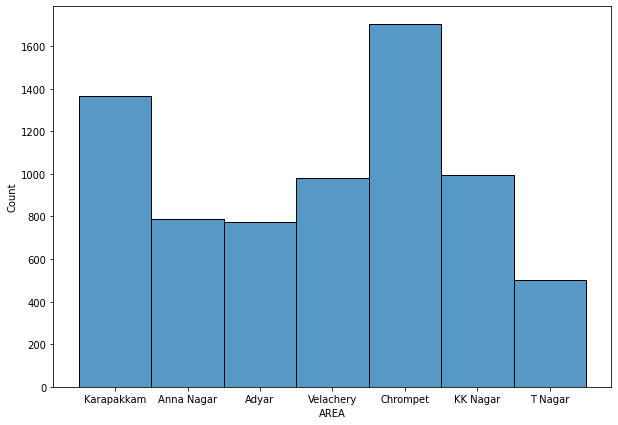

In [231]:
# EDA on AREA 
plt.figure(figsize=(10,7))
sns.histplot(df.AREA)

In [232]:
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

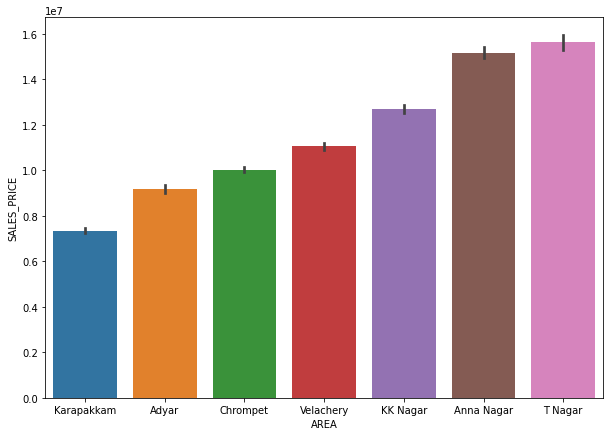

In [233]:
plt.figure(figsize=(10,7))
sns.barplot(x=df.AREA,y=df.SALES_PRICE,data=df,order=area_order)

<AxesSubplot:xlabel='SALE_COND', ylabel='Count'>

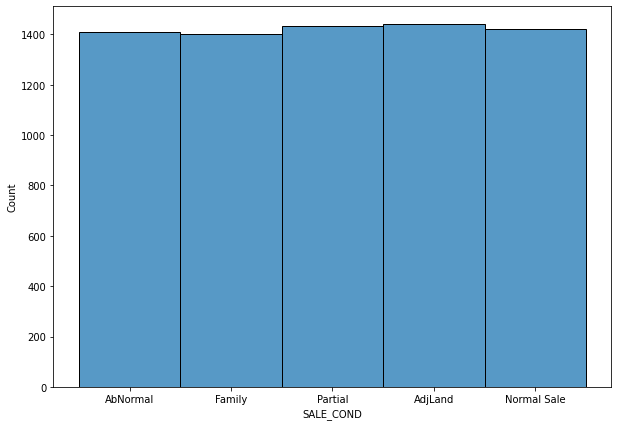

In [234]:
# EDA on SAlE_COND
plt.figure(figsize=(10,7))
sns.histplot(df.SALE_COND)

<AxesSubplot:xlabel='SALE_COND', ylabel='SALES_PRICE'>

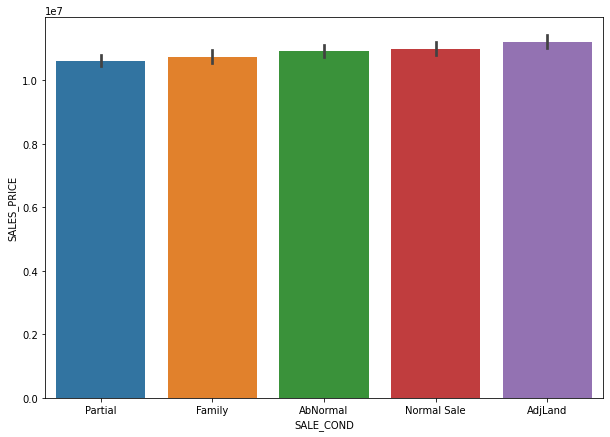

In [235]:
order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
plt.figure(figsize=(10,7))
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,data=df,order=order)

<AxesSubplot:xlabel='BUILDTYPE', ylabel='Count'>

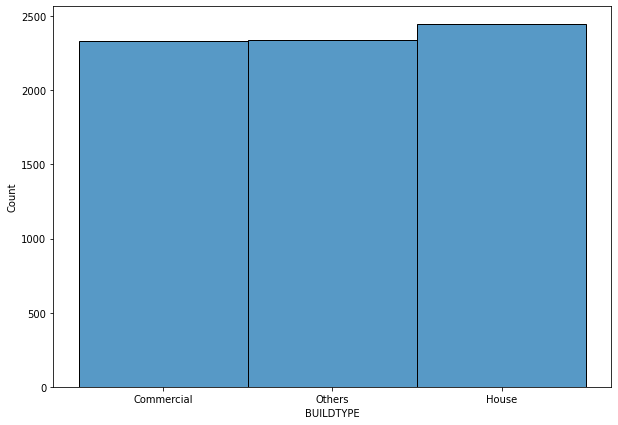

In [236]:
# EDA on BUILD TYPE
plt.figure(figsize=(10,7))
sns.histplot(df.BUILDTYPE)

<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

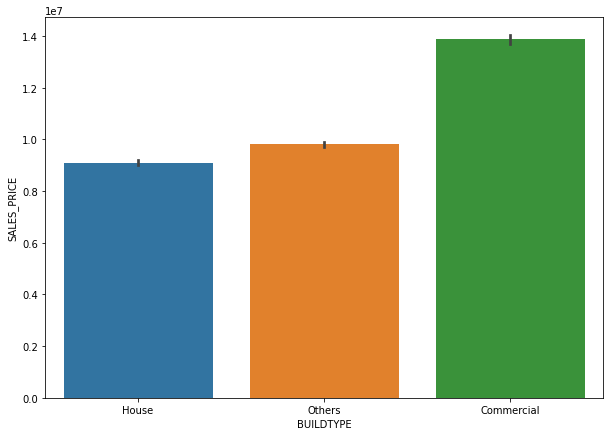

In [237]:
order = df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE']
plt.figure(figsize=(10,7))
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE,data=df,order=order)

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='Count'>

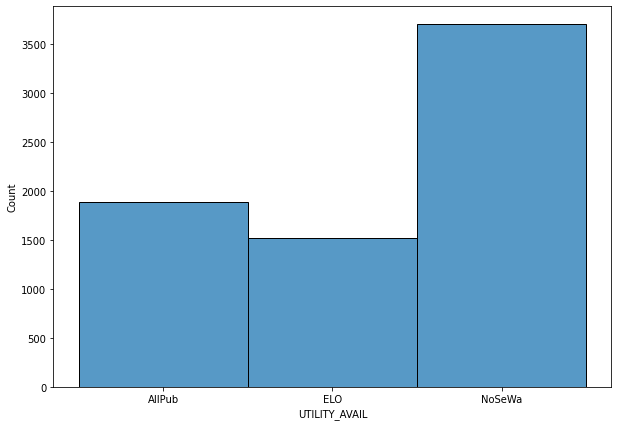

In [238]:
# EDA on UTILITY_AVAIL
plt.figure(figsize=(10,7))
sns.histplot(df.UTILITY_AVAIL)

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE'>

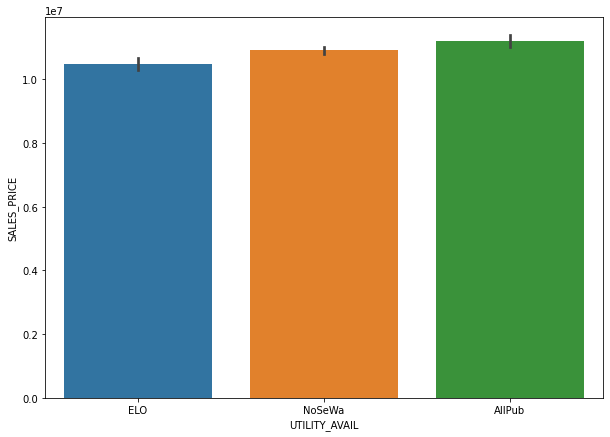

In [239]:
order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
plt.figure(figsize=(10,7))
sns.barplot(x=df.UTILITY_AVAIL,y=df.SALES_PRICE,data=df,order=order)

<AxesSubplot:xlabel='STREET', ylabel='Count'>

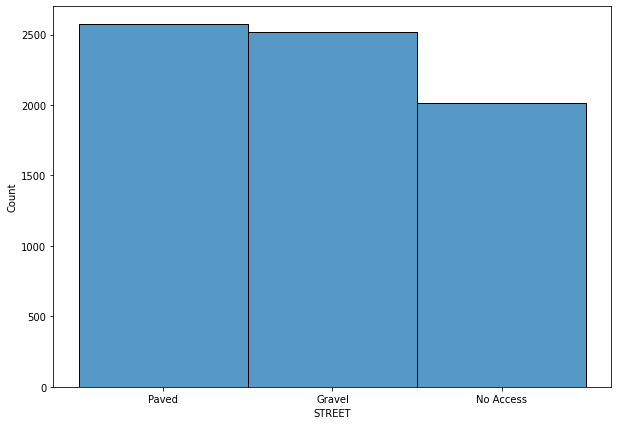

In [240]:
# EDA ON STREET
plt.figure(figsize=(10,7))
sns.histplot(df.STREET)

<AxesSubplot:xlabel='STREET', ylabel='SALES_PRICE'>

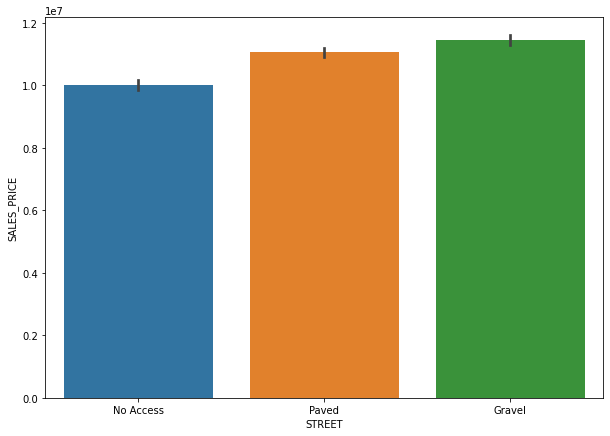

In [241]:
order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
plt.figure(figsize=(10,7))
sns.barplot(x=df.STREET,y=df.SALES_PRICE,data=df,order=order)

<AxesSubplot:xlabel='MZZONE', ylabel='count'>

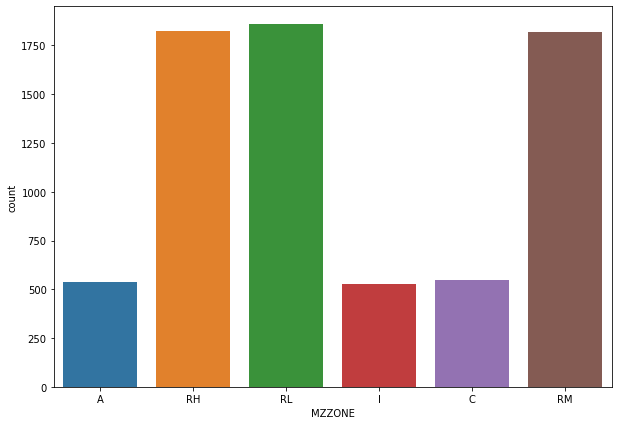

In [242]:
# EDA ON MZZONE 
plt.figure(figsize=(10,7))
sns.countplot(df.MZZONE)

<AxesSubplot:xlabel='MZZONE', ylabel='SALES_PRICE'>

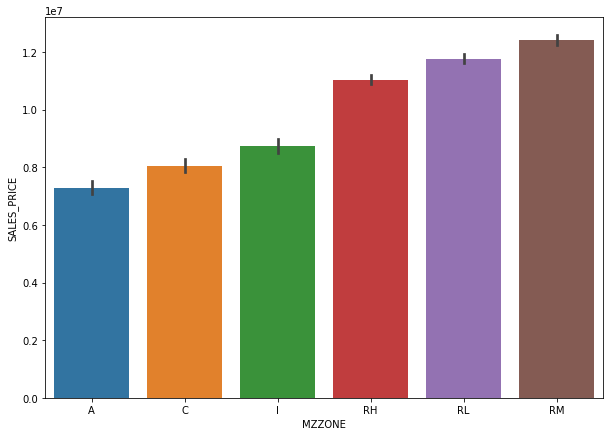

In [243]:
order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
plt.figure(figsize=(10,7))
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,data=df,order=order)

<AxesSubplot:xlabel='PARK_FACIL', ylabel='count'>

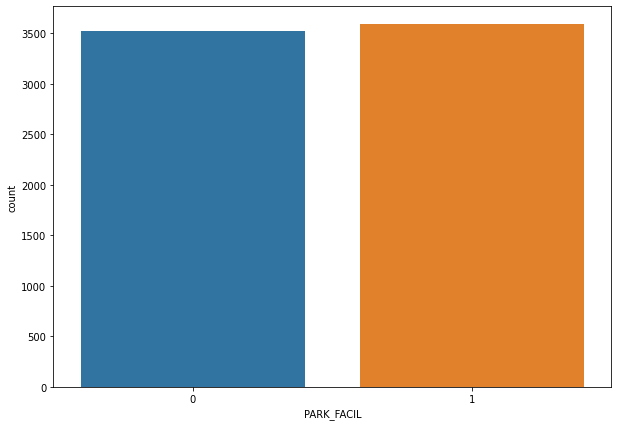

In [244]:
# EDA ON PARK_FACIL
plt.figure(figsize=(10,7))
sns.countplot(df.PARK_FACIL)

<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

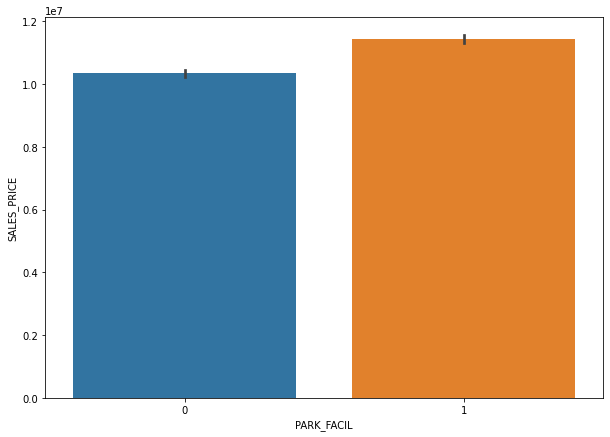

In [245]:
order = df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL']
plt.figure(figsize=(10,7))
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,data=df,order=order)

EDA ON NUMERICAL COLUMNS 

<Figure size 720x504 with 0 Axes>

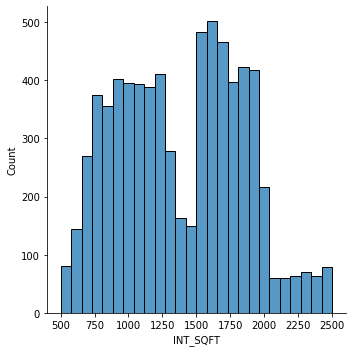

In [246]:
# EDA ON INT_SQFT
plt.figure(figsize=(10,7))
sns.displot(df.INT_SQFT)

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

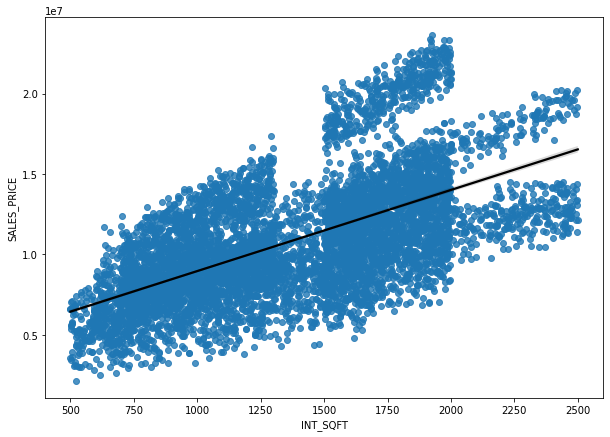

In [247]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.INT_SQFT,y=df.SALES_PRICE,data=df,line_kws={'color':'black'})

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='Count'>

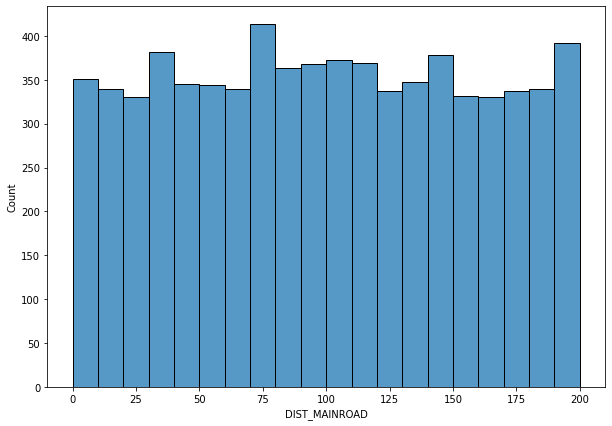

In [248]:
# EDA ON DIST_MAINROAD
plt.figure(figsize=(10,7))
sns.histplot(df.DIST_MAINROAD)

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

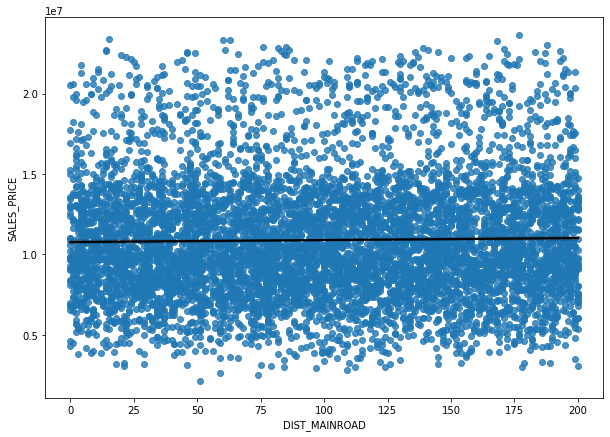

In [249]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.DIST_MAINROAD,y=df.SALES_PRICE,data=df,line_kws={'color':'black'})

<AxesSubplot:xlabel='N_ROOM', ylabel='count'>

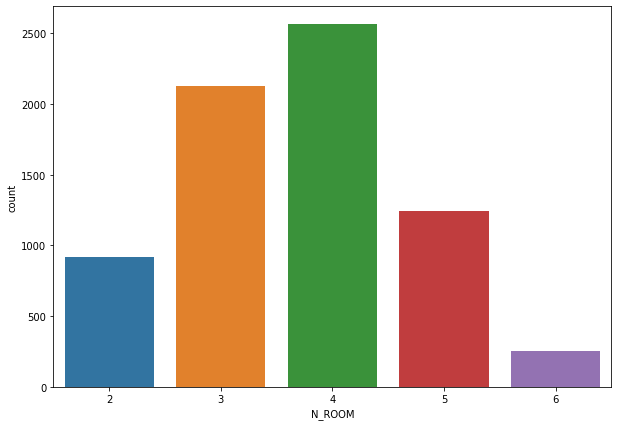

In [250]:
#EDA ON N_ROOM, N_BEDROOM AND N_BATHROOM
plt.figure(figsize=(10,7))
sns.countplot(df.N_ROOM)

<AxesSubplot:xlabel='N_ROOM', ylabel='SALES_PRICE'>

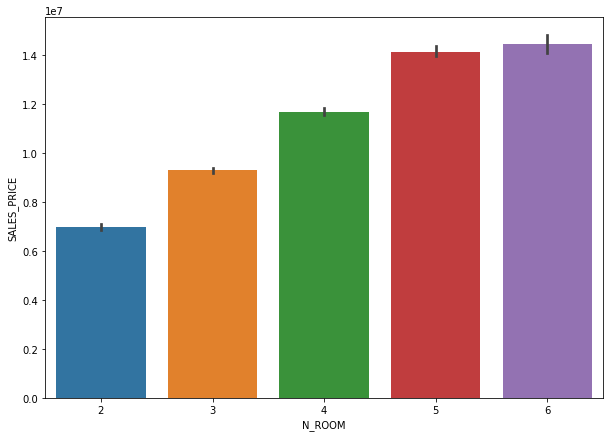

In [251]:
plt.figure(figsize=(10,7))
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE,)

<AxesSubplot:xlabel='N_ROOM', ylabel='SALES_PRICE'>

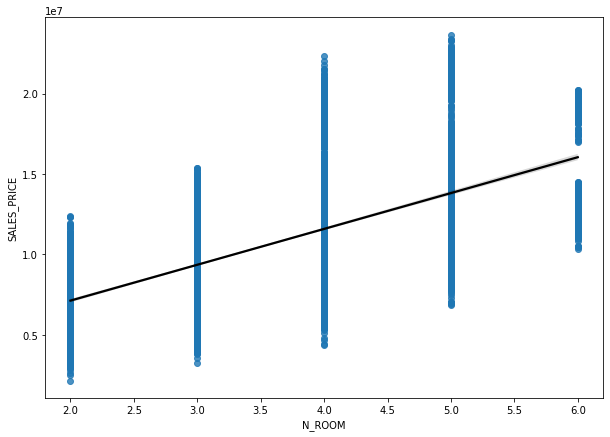

In [252]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.N_ROOM,y=df.SALES_PRICE,data=df,line_kws={'color':'black'})

<AxesSubplot:xlabel='N_BEDROOM', ylabel='count'>

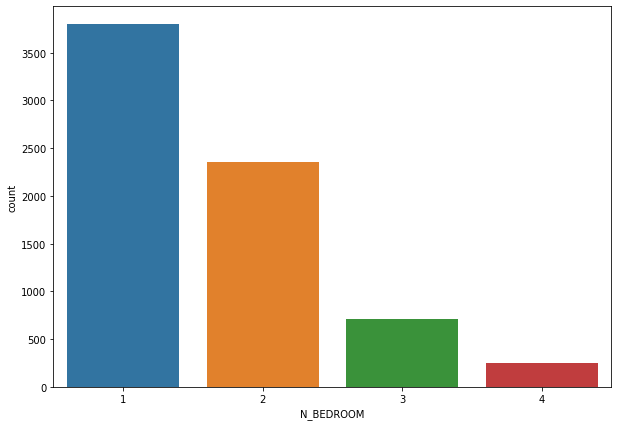

In [253]:
plt.figure(figsize=(10,7))
sns.countplot(df.N_BEDROOM)

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

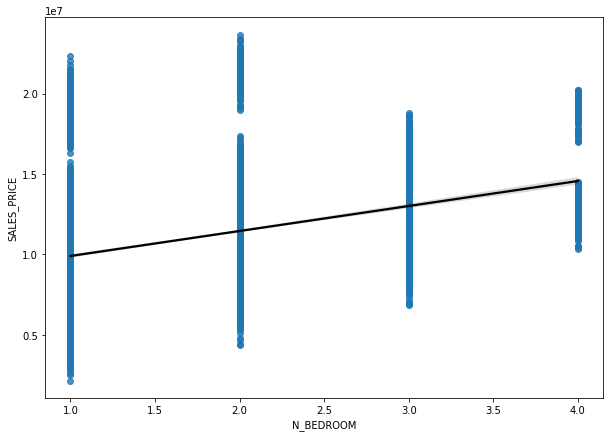

In [254]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.N_BEDROOM,y=df.SALES_PRICE,data=df,line_kws={'color':'black'})

<AxesSubplot:xlabel='N_BATHROOM', ylabel='count'>

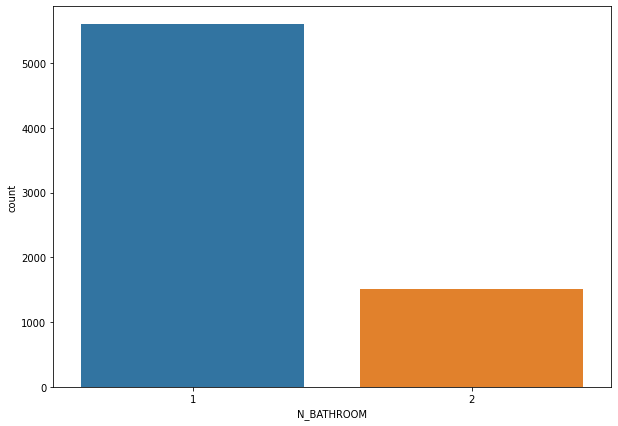

In [255]:
plt.figure(figsize=(10,7))
sns.countplot(df.N_BATHROOM)

<AxesSubplot:xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

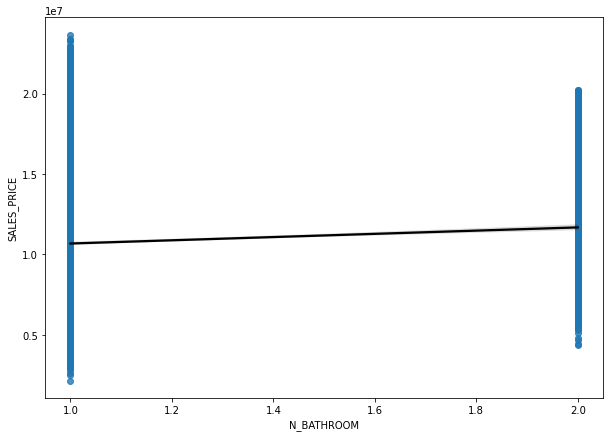

In [256]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.N_BATHROOM,y=df.SALES_PRICE,data=df,line_kws={'color':'black'})

<AxesSubplot:xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

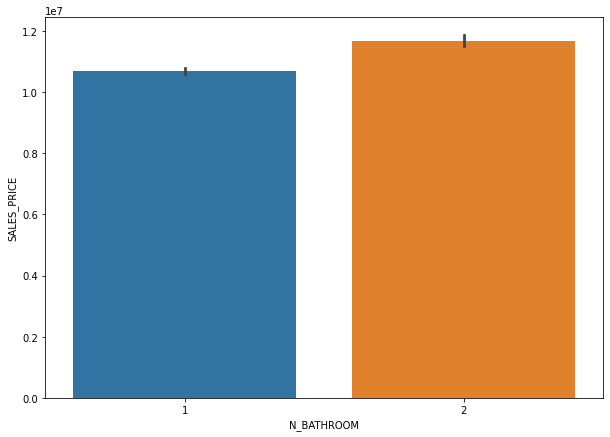

In [257]:
plt.figure(figsize=(10,7))
sns.barplot(x=df.N_BATHROOM,y=df.SALES_PRICE)

<AxesSubplot:xlabel='QS_ROOMS', ylabel='Density'>

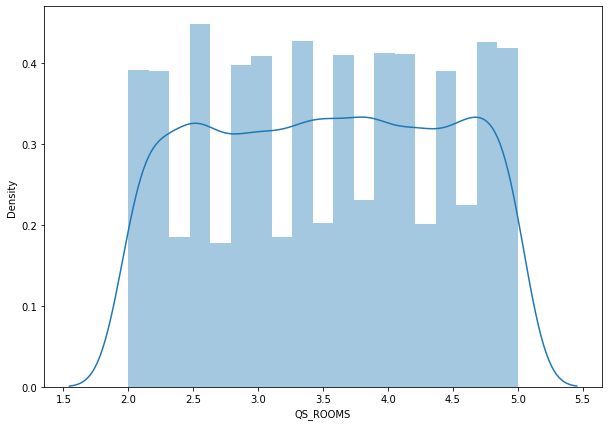

In [258]:
# EDA ON QS COLS
plt.figure(figsize=(10,7))
sns.distplot(df.QS_ROOMS)

<AxesSubplot:xlabel='QS_ROOMS', ylabel='SALES_PRICE'>

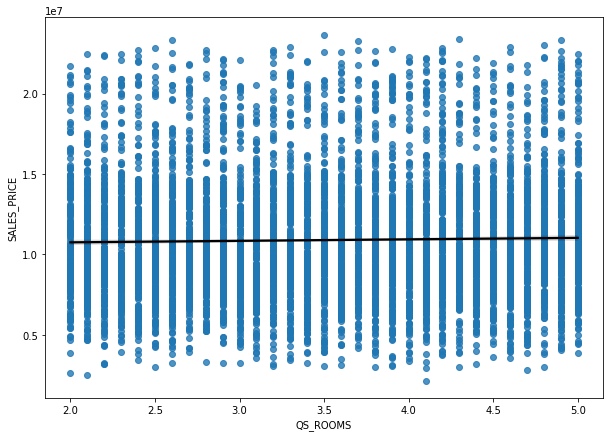

In [259]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.QS_ROOMS,y=df.SALES_PRICE,data=df,line_kws={'color':'black'})

<AxesSubplot:xlabel='QS_BEDROOM', ylabel='Density'>

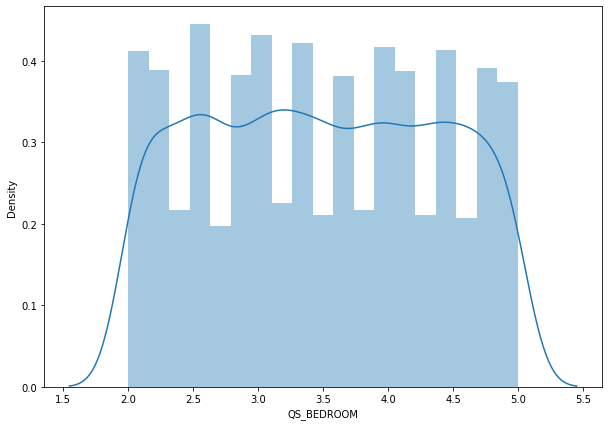

In [260]:
plt.figure(figsize=(10,7))
sns.distplot(df.QS_BEDROOM)

<AxesSubplot:xlabel='QS_BEDROOM', ylabel='SALES_PRICE'>

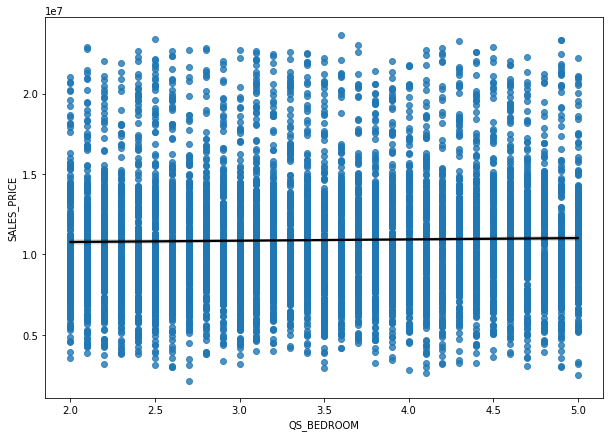

In [261]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.QS_BEDROOM,y=df.SALES_PRICE,data=df,line_kws={'color':'black'})

<AxesSubplot:xlabel='QS_BATHROOM', ylabel='Density'>

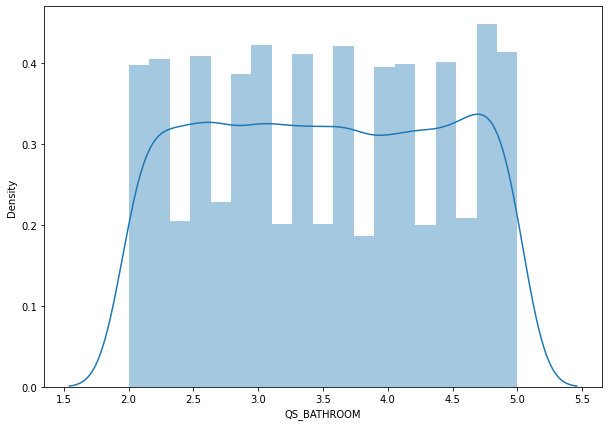

In [262]:
plt.figure(figsize=(10,7))
sns.distplot(df.QS_BATHROOM)

<AxesSubplot:xlabel='QS_BATHROOM', ylabel='SALES_PRICE'>

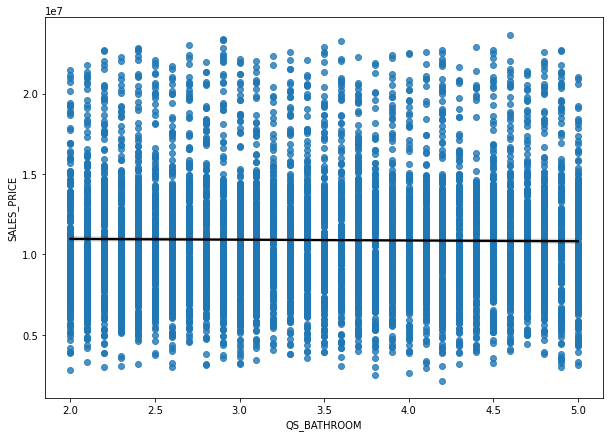

In [263]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.QS_BATHROOM,y=df.SALES_PRICE,data=df,line_kws={'color':'black'})

<AxesSubplot:xlabel='QS_OVERALL', ylabel='Density'>

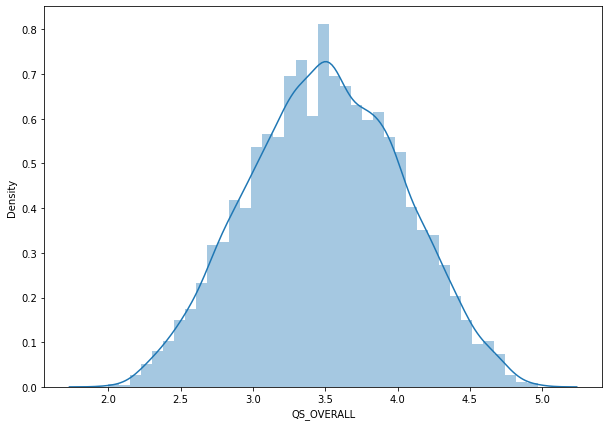

In [264]:
plt.figure(figsize=(10,7))
sns.distplot(df.QS_OVERALL)

<AxesSubplot:xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

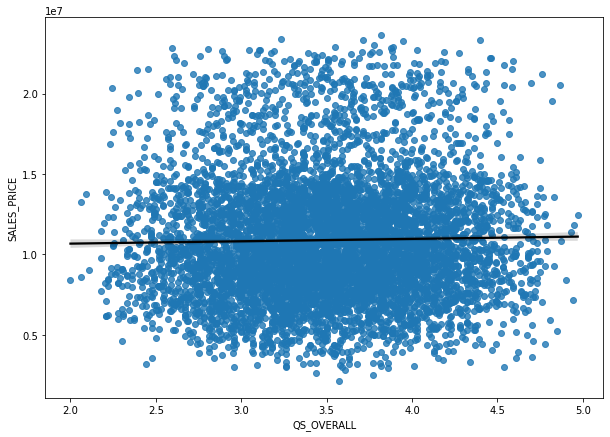

In [265]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.QS_OVERALL,y=df.SALES_PRICE,data=df,line_kws={'color':'black'})

<AxesSubplot:xlabel='AGE', ylabel='Density'>

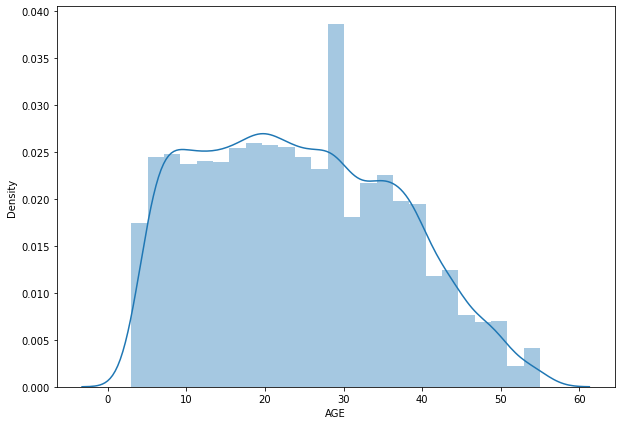

In [266]:
# EDA ON AGE 
plt.figure(figsize=(10,7))
sns.distplot(df.AGE)

<AxesSubplot:xlabel='AGE', ylabel='SALES_PRICE'>

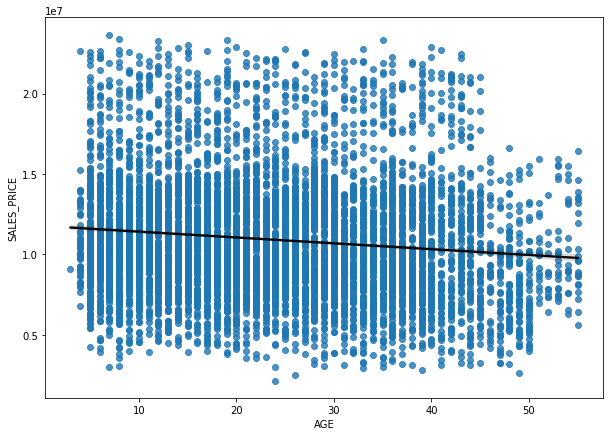

In [267]:
plt.figure(figsize=(10,7))
sns.regplot(x=df.AGE,y=df.SALES_PRICE,data=df,line_kws={'color':'black'})

<AxesSubplot:xlabel='SALES_PRICE', ylabel='Density'>

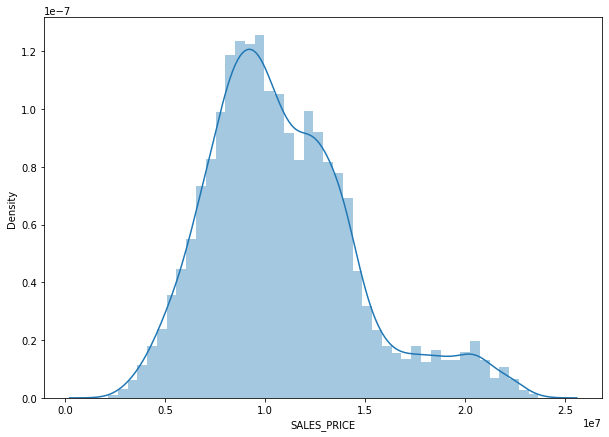

In [268]:
# EDA ON SALES_PRICE (Target)
plt.figure(figsize=(10,7))
sns.distplot(df.SALES_PRICE)

In [269]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

In [270]:
# From the above EDA we can say that 
# the cols INT_SQFT, N_BEDROOM, N_BATHROOM and N_ROOM has high Feature importance 
# and features like DIST_MAINROAD, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL has less Feature importance so we can drop this cols 

In [271]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,1,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,0,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,1,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,0,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,1,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,0,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,49
7105,Velachery,1897,52,3,2,5,Family,1,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,9
7106,Velachery,1614,152,2,1,4,Normal Sale,0,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,28
7107,Karapakkam,787,40,1,1,2,Partial,1,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,32


In [272]:
y = df.SALES_PRICE
df = df.drop(['DIST_MAINROAD','SALE_COND','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','SALES_PRICE'],axis=1)

In [273]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,AGE
0,Karapakkam,1004,1,1,3,1,Commercial,AllPub,Paved,A,44
1,Anna Nagar,1986,2,1,5,0,Commercial,AllPub,Gravel,RH,11
2,Adyar,909,1,1,3,1,Commercial,ELO,Gravel,RL,20
3,Velachery,1855,3,2,5,0,Others,NoSeWa,Paved,I,22
4,Karapakkam,1226,1,1,3,1,Others,AllPub,Gravel,C,30
...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,0,Others,ELO,No Access,RM,49
7105,Velachery,1897,3,2,5,1,Others,NoSeWa,No Access,RH,9
7106,Velachery,1614,2,1,4,0,House,NoSeWa,Gravel,I,28
7107,Karapakkam,787,1,1,2,1,Commercial,ELO,Paved,RL,32


In [66]:
df[['AREA','MZZONE']].drop_duplicates().sort_values(by='AREA')

,AREA,MZZONE
2,Adyar,RL
68,Adyar,I
49,Adyar,C
13,Adyar,RH
39,Adyar,RM
18,Adyar,A
75,Anna Nagar,RM
1,Anna Nagar,RH
19,Anna Nagar,RL
5,Chrompet,RH


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7109 non-null   object
 1   INT_SQFT       7109 non-null   int64 
 2   N_BEDROOM      7109 non-null   int64 
 3   N_BATHROOM     7109 non-null   int64 
 4   N_ROOM         7109 non-null   int64 
 5   PARK_FACIL     7109 non-null   int64 
 6   BUILDTYPE      7109 non-null   object
 7   UTILITY_AVAIL  7109 non-null   object
 8   STREET         7109 non-null   object
 9   MZZONE         7109 non-null   object
 10  AGE            7109 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 611.1+ KB


In [68]:
# ENCODING 
area_map ={
    'Karapakkam' : 0,
    'Adyar': 1,
    'Chrompet': 2,
    'Velachery': 3,
    'KK Nagar': 4,
    'Anna Nagar': 5,
    'T Nagar' : 6

}
df.AREA = df.AREA.map(area_map)

In [69]:
mzzone_map = {
    'A' : 0,
    'C' : 1,
    'I' : 2,
    'RH': 4,
    'RL': 5,
    'RM': 6
}
df.MZZONE = df.MZZONE.map(mzzone_map)

In [70]:
utility_map = {
    'ELO'    : 0,
    'NoSeWa' : 1,
    'AllPub' : 2
}
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map(utility_map)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7109 non-null   int64 
 1   INT_SQFT       7109 non-null   int64 
 2   N_BEDROOM      7109 non-null   int64 
 3   N_BATHROOM     7109 non-null   int64 
 4   N_ROOM         7109 non-null   int64 
 5   PARK_FACIL     7109 non-null   int64 
 6   BUILDTYPE      7109 non-null   object
 7   UTILITY_AVAIL  7109 non-null   int64 
 8   STREET         7109 non-null   object
 9   MZZONE         7109 non-null   int64 
 10  AGE            7109 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 611.1+ KB


In [275]:
x = df
x

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,AGE
0,Karapakkam,1004,1,1,3,1,Commercial,AllPub,Paved,A,44
1,Anna Nagar,1986,2,1,5,0,Commercial,AllPub,Gravel,RH,11
2,Adyar,909,1,1,3,1,Commercial,ELO,Gravel,RL,20
3,Velachery,1855,3,2,5,0,Others,NoSeWa,Paved,I,22
4,Karapakkam,1226,1,1,3,1,Others,AllPub,Gravel,C,30
...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,0,Others,ELO,No Access,RM,49
7105,Velachery,1897,3,2,5,1,Others,NoSeWa,No Access,RH,9
7106,Velachery,1614,2,1,4,0,House,NoSeWa,Gravel,I,28
7107,Karapakkam,787,1,1,2,1,Commercial,ELO,Paved,RL,32


In [73]:
# Splitting Data into Test and train 

In [276]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [277]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((4976, 11), (2133, 11), (4976,), (2133,))

In [175]:
# scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)

In [176]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [177]:
# Modeling Uisng Linear Regression 
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [178]:
y_pred = lr_model.predict(x_test)
y_train_pred = lr_model.predict(x_train)

In [179]:

x3 = (np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
x4 = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [180]:
x1 = lr_model.score(x_train, y_train)
x2 = lr_model.score(x_test, y_test)

In [181]:
resultsDf = pd.DataFrame({'R Square train': [x1], 'R Square test': [x2],'RMSE train': [x3],'RMSE test': [x4]},index=['Linear Regression'])
resultsDf

,R Square train,R Square test,RMSE train,RMSE test
Linear Regression,0.954023,0.955664,800276.137958,810147.653156


In [182]:
# modeling using KNN Regressor 
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [183]:
y_pred = knn.predict(x_test)
y_train_pred = knn.predict(x_train)

In [184]:
x1 = (knn.score(x_train,y_train))
x2 = knn.score(x_test,y_test)

In [185]:
x3 = (np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
x4 = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [186]:
resultsDf_2 = pd.DataFrame({'R Square train': [x1], 'R Square test': [x2],'RMSE train': [x3],'RMSE test': [x4]},index=['KNN Regression'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,R Square train,R Square test,RMSE train,RMSE test
Linear Regression,0.954023,0.955664,800276.137958,8.101477e+05
KNN Regression,0.950321,0.926411,831876.060218,1.043735e+06


In [187]:
# Modeling using DT regressor 
from sklearn.tree import DecisionTreeRegressor
dt_r = DecisionTreeRegressor()
dt_r.fit(x_train,y_train)

DecisionTreeRegressor()

In [188]:
y_pred = dt_r.predict(x_test)
y_train_pred = dt_r.predict(x_train)

In [189]:
x1 = (dt_r.score(x_train,y_train))
x2 = dt_r.score(x_test,y_test)

In [190]:
x3 = (np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
x4 = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [191]:
resultsDf_2 = pd.DataFrame({'R Square train': [x1], 'R Square test': [x2],'RMSE train': [x3],'RMSE test': [x4]},index=['DecisionTree Regression'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,R Square train,R Square test,RMSE train,RMSE test
Linear Regression,0.954023,0.955664,800276.137958,8.101477e+05
KNN Regression,0.950321,0.926411,831876.060218,1.043735e+06
DecisionTree Regression,0.999998,0.971075,4797.527917,6.543622e+05


In [192]:
# modeling using Random forest regressor 
from sklearn.ensemble import RandomForestRegressor
rf_r =  RandomForestRegressor()
rf_r.fit(x_train,y_train)

RandomForestRegressor()

In [193]:
y_pred = rf_r.predict(x_test)
y_train_pred = rf_r.predict(x_train)

In [194]:
x3 = (np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
x4 = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [195]:
x1 = (rf_r.score(x_train,y_train))
x2 = rf_r.score(x_test,y_test)

In [196]:
resultsDf_2 = pd.DataFrame({'R Square train': [x1], 'R Square test': [x2],'RMSE train': [x3],'RMSE test': [x4]},index=['RandomForest Regression'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,R Square train,R Square test,RMSE train,RMSE test
Linear Regression,0.954023,0.955664,800276.137958,8.101477e+05
KNN Regression,0.950321,0.926411,831876.060218,1.043735e+06
DecisionTree Regression,0.999998,0.971075,4797.527917,6.543622e+05
RandomForest Regression,0.997954,0.986585,168825.204096,4.456323e+05


In [197]:
# modeling using Xgboost regressor 
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [198]:
y_pred = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

In [199]:
x3 = (np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
x4 = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [200]:
x1 = (xgb.score(x_train,y_train))
x2 = xgb.score(x_test,y_test)

In [201]:
resultsDf_2 = pd.DataFrame({'R Square train': [x1], 'R Square test': [x2],'RMSE train': [x3],'RMSE test': [x4]},index=['XGboost Regression'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,R Square train,R Square test,RMSE train,RMSE test
Linear Regression,0.954023,0.955664,800276.137958,8.101477e+05
KNN Regression,0.950321,0.926411,831876.060218,1.043735e+06
DecisionTree Regression,0.999998,0.971075,4797.527917,6.543622e+05
RandomForest Regression,0.997954,0.986585,168825.204096,4.456323e+05
XGboost Regression,0.998447,0.992918,147084.698510,3.237991e+05


,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,AGE
0,Karapakkam,1004,1,1,3,1,Commercial,AllPub,Paved,A,44
1,Anna Nagar,1986,2,1,5,0,Commercial,AllPub,Gravel,RH,11
2,Adyar,909,1,1,3,1,Commercial,ELO,Gravel,RL,20
3,Velachery,1855,3,2,5,0,Others,NoSeWa,Paved,I,22
4,Karapakkam,1226,1,1,3,1,Others,AllPub,Gravel,C,30
...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,0,Others,ELO,No Access,RM,49
7105,Velachery,1897,3,2,5,1,Others,NoSeWa,No Access,RH,9
7106,Velachery,1614,2,1,4,0,House,NoSeWa,Gravel,I,28
7107,Karapakkam,787,1,1,2,1,Commercial,ELO,Paved,RL,32


In [204]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,AGE
0,Karapakkam,1004,1,1,3,1,Commercial,AllPub,Paved,A,44
1,Anna Nagar,1986,2,1,5,0,Commercial,AllPub,Gravel,RH,11
2,Adyar,909,1,1,3,1,Commercial,ELO,Gravel,RL,20
3,Velachery,1855,3,2,5,0,Others,NoSeWa,Paved,I,22
4,Karapakkam,1226,1,1,3,1,Others,AllPub,Gravel,C,30
...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,0,Others,ELO,No Access,RM,49
7105,Velachery,1897,3,2,5,1,Others,NoSeWa,No Access,RH,9
7106,Velachery,1614,2,1,4,0,House,NoSeWa,Gravel,I,28
7107,Karapakkam,787,1,1,2,1,Commercial,ELO,Paved,RL,32


In [287]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf1 = ColumnTransformer([
('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,6,7,8,9])
],remainder='passthrough')

In [288]:
trf3 = XGBRegressor()

In [289]:
pipe = make_pipeline(trf1,trf3)


In [290]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 6, 7, 8, 9])])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=Fa...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [291]:
pipe.score(x_test,y_test)

0.9915309151467582

In [292]:
pipe.score(x_train,y_train)

0.9984405384306456

In [293]:
y_pred = pipe.predict(x_test)

In [297]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

NameError: name 'c' is not defined

In [330]:
newv = x.iloc[125,:].values
newv

array(['T Nagar', 1973, 2, 1, 5, 1, 'Commercial', 'AllPub', 'Gravel',
       'RM', 35], dtype=object)

In [349]:
pipe.predict(np.array([['T Nagar',1973,2,1,5,1,'Commercial','AllPub','Gravel','RM',35]]))

XGBoostError: [00:19:04] c:\users\administrator\workspace\xgboost-win64_release_1.6.0\src\data\array_interface.h:462: Unicode-3 is not supported.